# Pharmaceutical Supply Chain Inventory Optimization

# Optimizing Inventory Considering Shelf Life and Market Trends to Reduce Loss from Overproduction

## 1. Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## 2. Data Exploration and Preprocessing

In [3]:
import os

In [6]:
os.chdir('C:/Users/USER/Documents/AMDARI')

In [8]:
print(os.listdir())

['Book1.xlsx', 'Dataset.csv', 'drug_data.xlsx', 'drug_data_revised.xlsx', 'feedback_data.csv', 'pandas error.jpg', 'product_data.csv', 'sales_data.csv', 'TechTrendPro.sql']


In [10]:
df = pd.read_csv('Dataset.csv')

In [12]:
df.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


In [14]:
df.isnull().sum()

Product_ID                0
Shelf_Life_Days           0
Sales_2021                0
Sales_2022                0
Market_Trend_Factor       0
Compliance_Status         0
Supplier_ID               0
Manufacturing_Location    0
Product_Category          0
Safety_Stock_Days         0
Storage_Location          0
dtype: int64

In [16]:
df.duplicated().all()

False

In [18]:
df.describe()

,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Safety_Stock_Days
count,19381.000000,19381.000000,19381.000000,19381.000000,19381.000000
mean,301.737939,618.423250,618.798256,0.999851,21.327073
std,25.576353,239.313199,220.590729,0.257548,7.090764
min,260.000000,80.000000,234.000000,0.078110,6.000000
25%,278.000000,429.000000,429.000000,0.823775,16.000000
50%,302.000000,619.200000,621.000000,1.000239,21.000000
75%,326.000000,811.200000,809.000000,1.175179,27.000000
max,344.000000,1155.400000,999.000000,1.909161,42.000000


## Bivariate Analysis

## Sales Against Numerical Variables

# Sales 2021 Against Categorical Variables

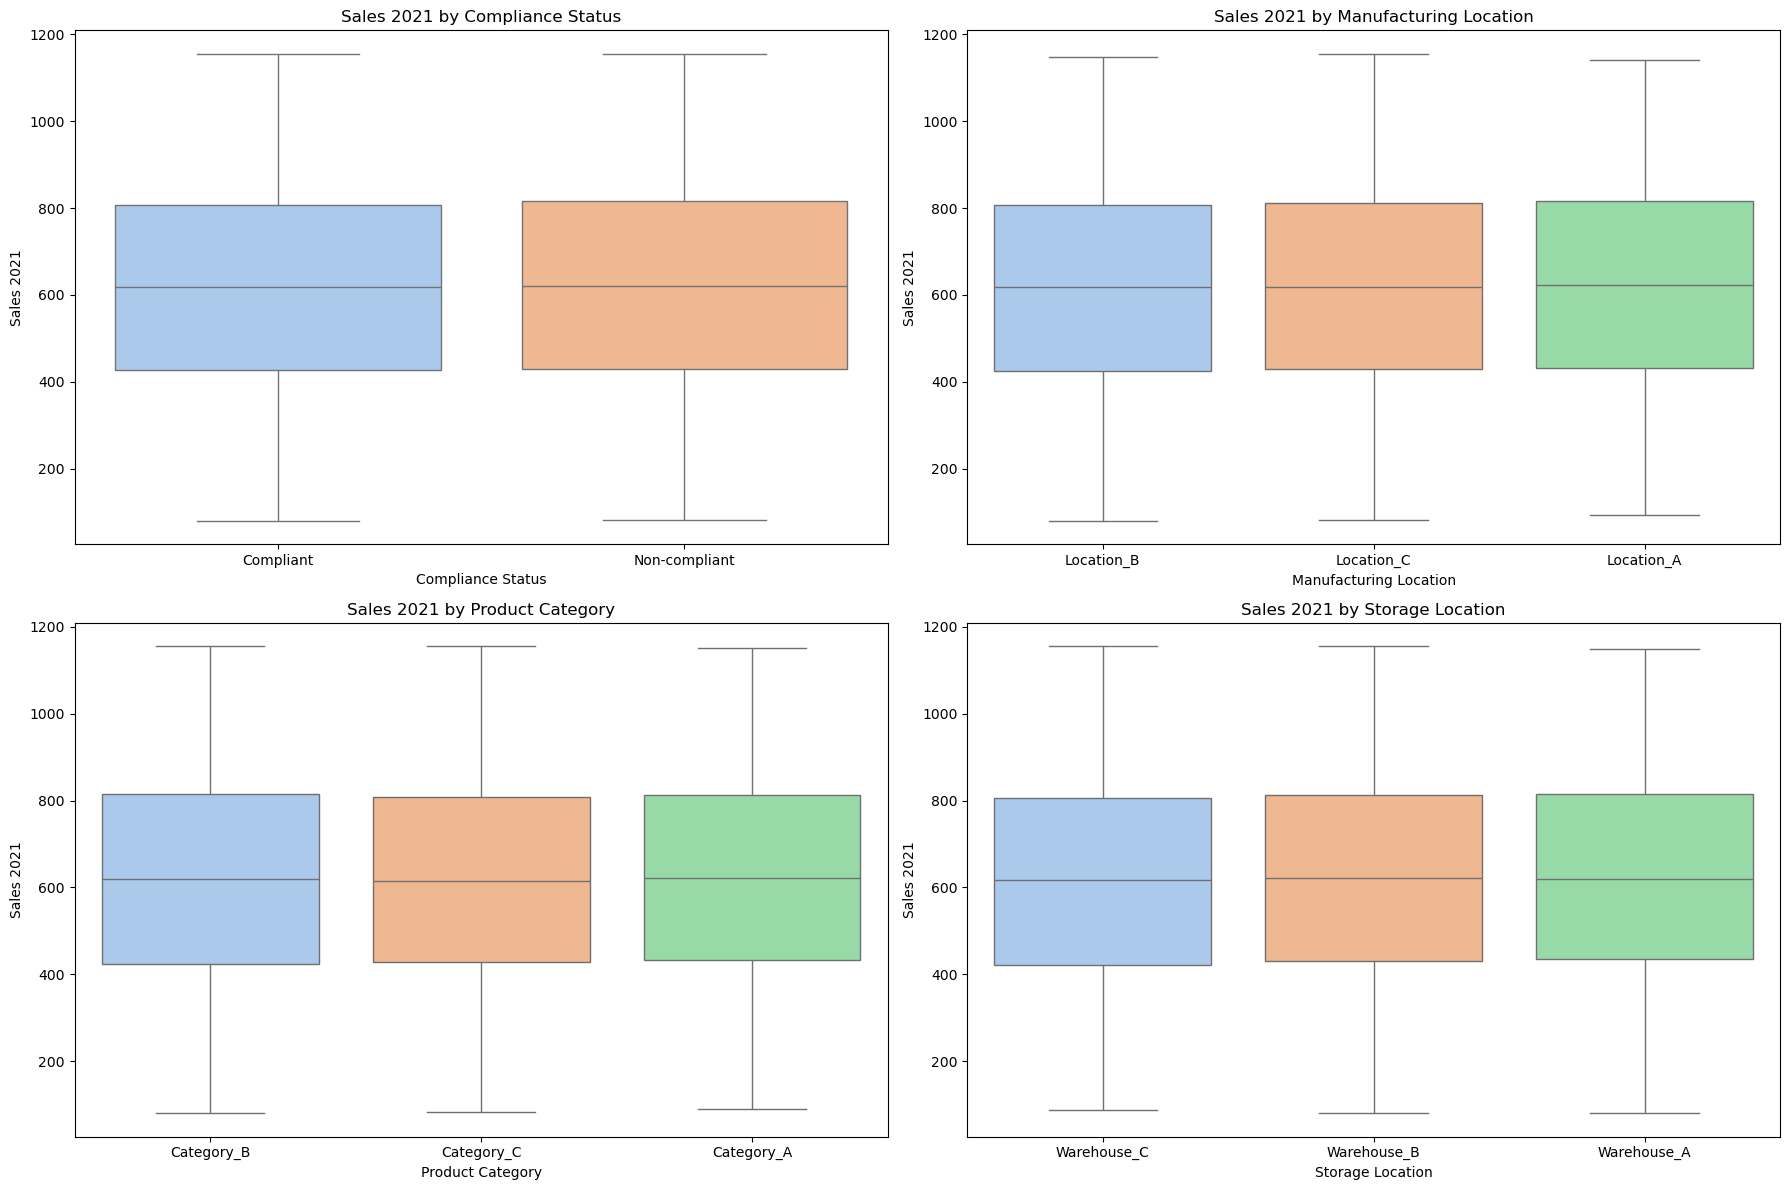

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
# Sales 2021 against Compliance Status
sns.boxplot(data=df, x='Compliance_Status', y='Sales_2021', ax=ax[0, 0], palette='pastel')
ax[0, 0].set_title('Sales 2021 by Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Sales 2021')

# Sales 2021 against Manufacturing Location
sns.boxplot(data=df, x='Manufacturing_Location', y='Sales_2021', ax=ax[0, 1], palette='pastel')
ax[0, 1].set_title('Sales 2021 by Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Sales 2021')

# Sales against product category
sns.boxplot(data=df, x='Product_Category', y='Sales_2021', ax=ax[1, 0], palette='pastel')
ax[1, 0].set_title('Sales 2021 by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Sales 2021')

# Sales 2021 against Storage Location
sns.boxplot(data=df, x='Storage_Location', y='Sales_2021', ax=ax[1, 1], palette='pastel')
ax[1, 1].set_title('Sales 2021 by Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Sales 2021')

plt.tight_layout()
plt.show()

# Sales 2022 Against Categorical Variables

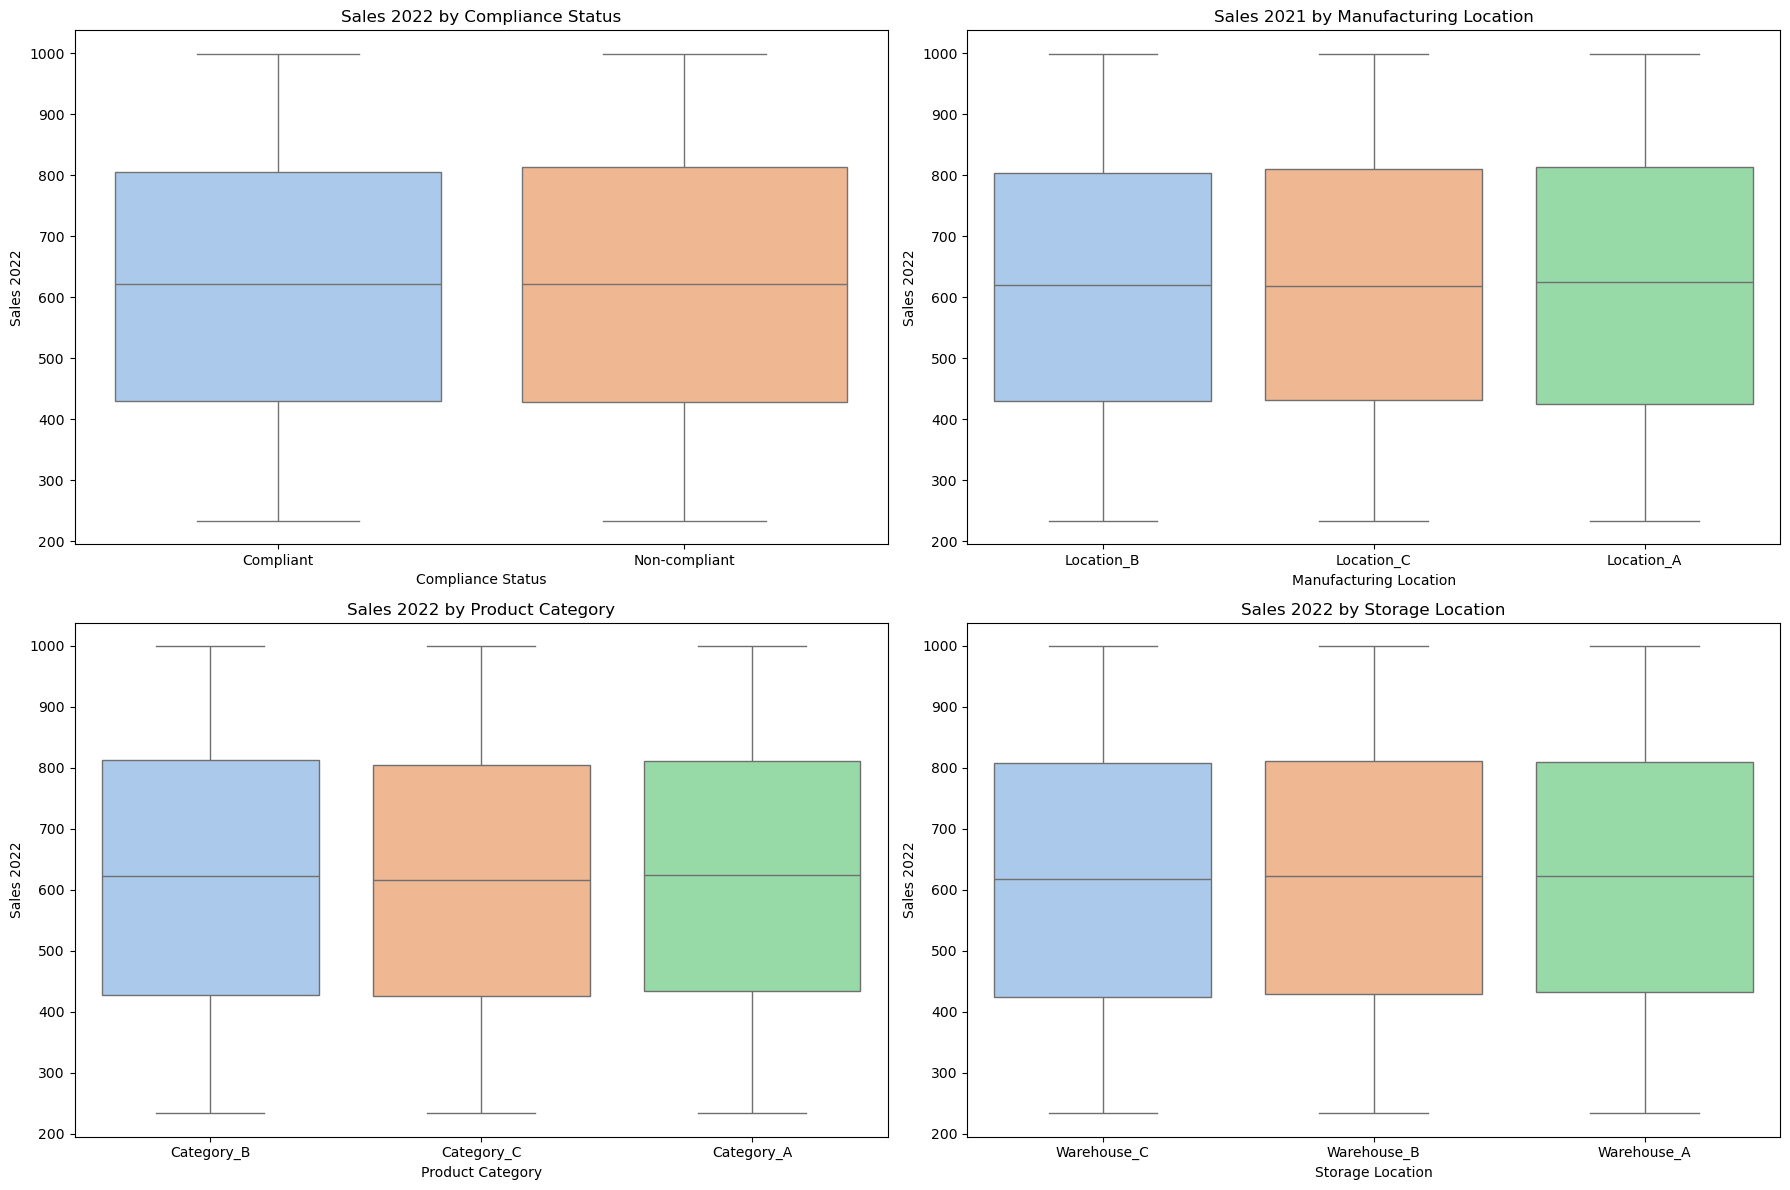

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
# Sales 2022 against Compliance Status
sns.boxplot(data=df, x='Compliance_Status', y='Sales_2022', ax=ax[0, 0], palette='pastel')
ax[0, 0].set_title('Sales 2022 by Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Sales 2022')

# Sales 2021 against Manufacturing Location
sns.boxplot(data=df, x='Manufacturing_Location', y='Sales_2022', ax=ax[0, 1], palette='pastel')
ax[0, 1].set_title('Sales 2021 by Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Sales 2022')

# Sales against product category
sns.boxplot(data=df, x='Product_Category', y='Sales_2022', ax=ax[1, 0], palette='pastel')
ax[1, 0].set_title('Sales 2022 by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Sales 2022')

# Sales 2022 against Storage Location
sns.boxplot(data=df, x='Storage_Location', y='Sales_2022', ax=ax[1, 1], palette='pastel')
ax[1, 1].set_title('Sales 2022 by Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Sales 2022')

plt.tight_layout()
plt.show()

# Bivariate Analysis: Sales Against Numerical Variables

### Sales against Shelve_life_days and Market_Trend_Factor
### Start with Sales against Shelve_life_days

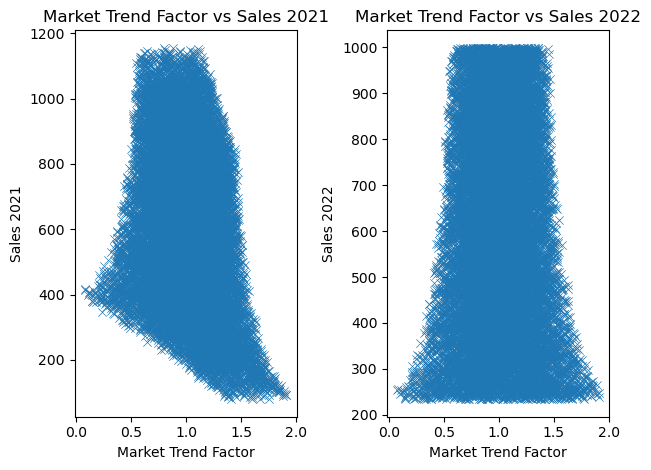

In [24]:
fig, ax = plt.subplots(1, 2)

# Market Trend Factor against Sales 2021
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2021', ax=ax[0], marker='x')
ax[0].set_title('Market Trend Factor vs Sales 2021')
ax[0].set_xlabel('Market Trend Factor')
ax[0].set_ylabel('Sales 2021')

# Market Trend Factor against Sales 2022
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022', ax=ax[1], marker='x')
ax[1].set_title('Market Trend Factor vs Sales 2022')
ax[1].set_xlabel('Market Trend Factor')
ax[1].set_ylabel('Sales 2022')

plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

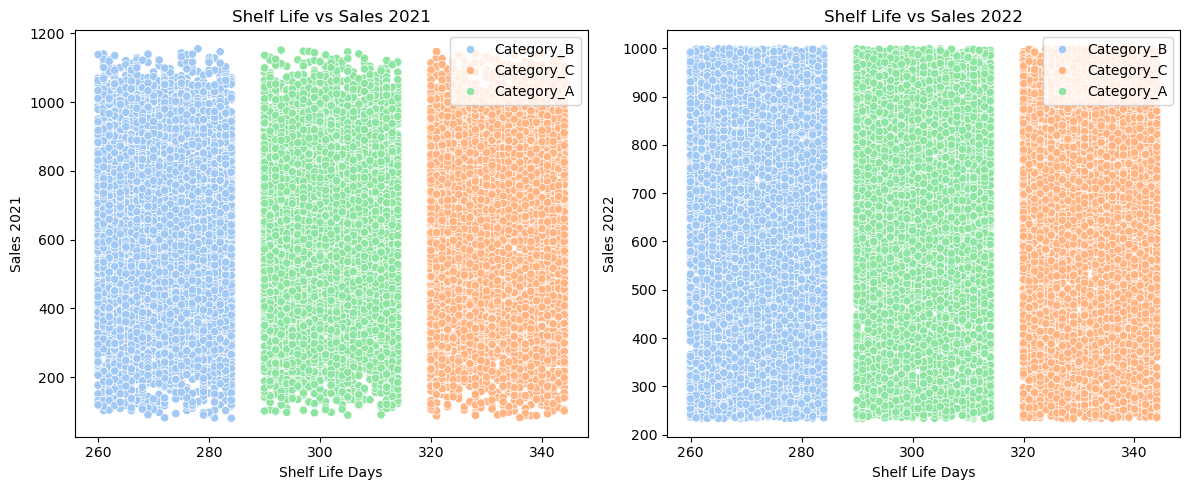

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Shelf Life Days against Sales 2021
sns.scatterplot(data=df, x='Shelf_Life_Days', y='Sales_2021', ax=ax[0], hue='Product_Category', palette='pastel')
ax[0].set_title('Shelf Life vs Sales 2021')
ax[0].set_xlabel('Shelf Life Days')
ax[0].set_ylabel('Sales 2021')
ax[0].legend(loc='upper right')

# Shelf Life Days against Sales 2022
sns.scatterplot(data=df, x='Shelf_Life_Days', y='Sales_2022', ax=ax[1], hue='Product_Category', palette='pastel')
ax[1].set_title('Shelf Life vs Sales 2022')
ax[1].set_xlabel('Shelf Life Days')
ax[1].set_ylabel('Sales 2022')
ax[1].legend (loc='upper right')

plt.tight_layout()
plt.show()

### Next plot for sale_2021, sale_2022, Market_Trend_Factor

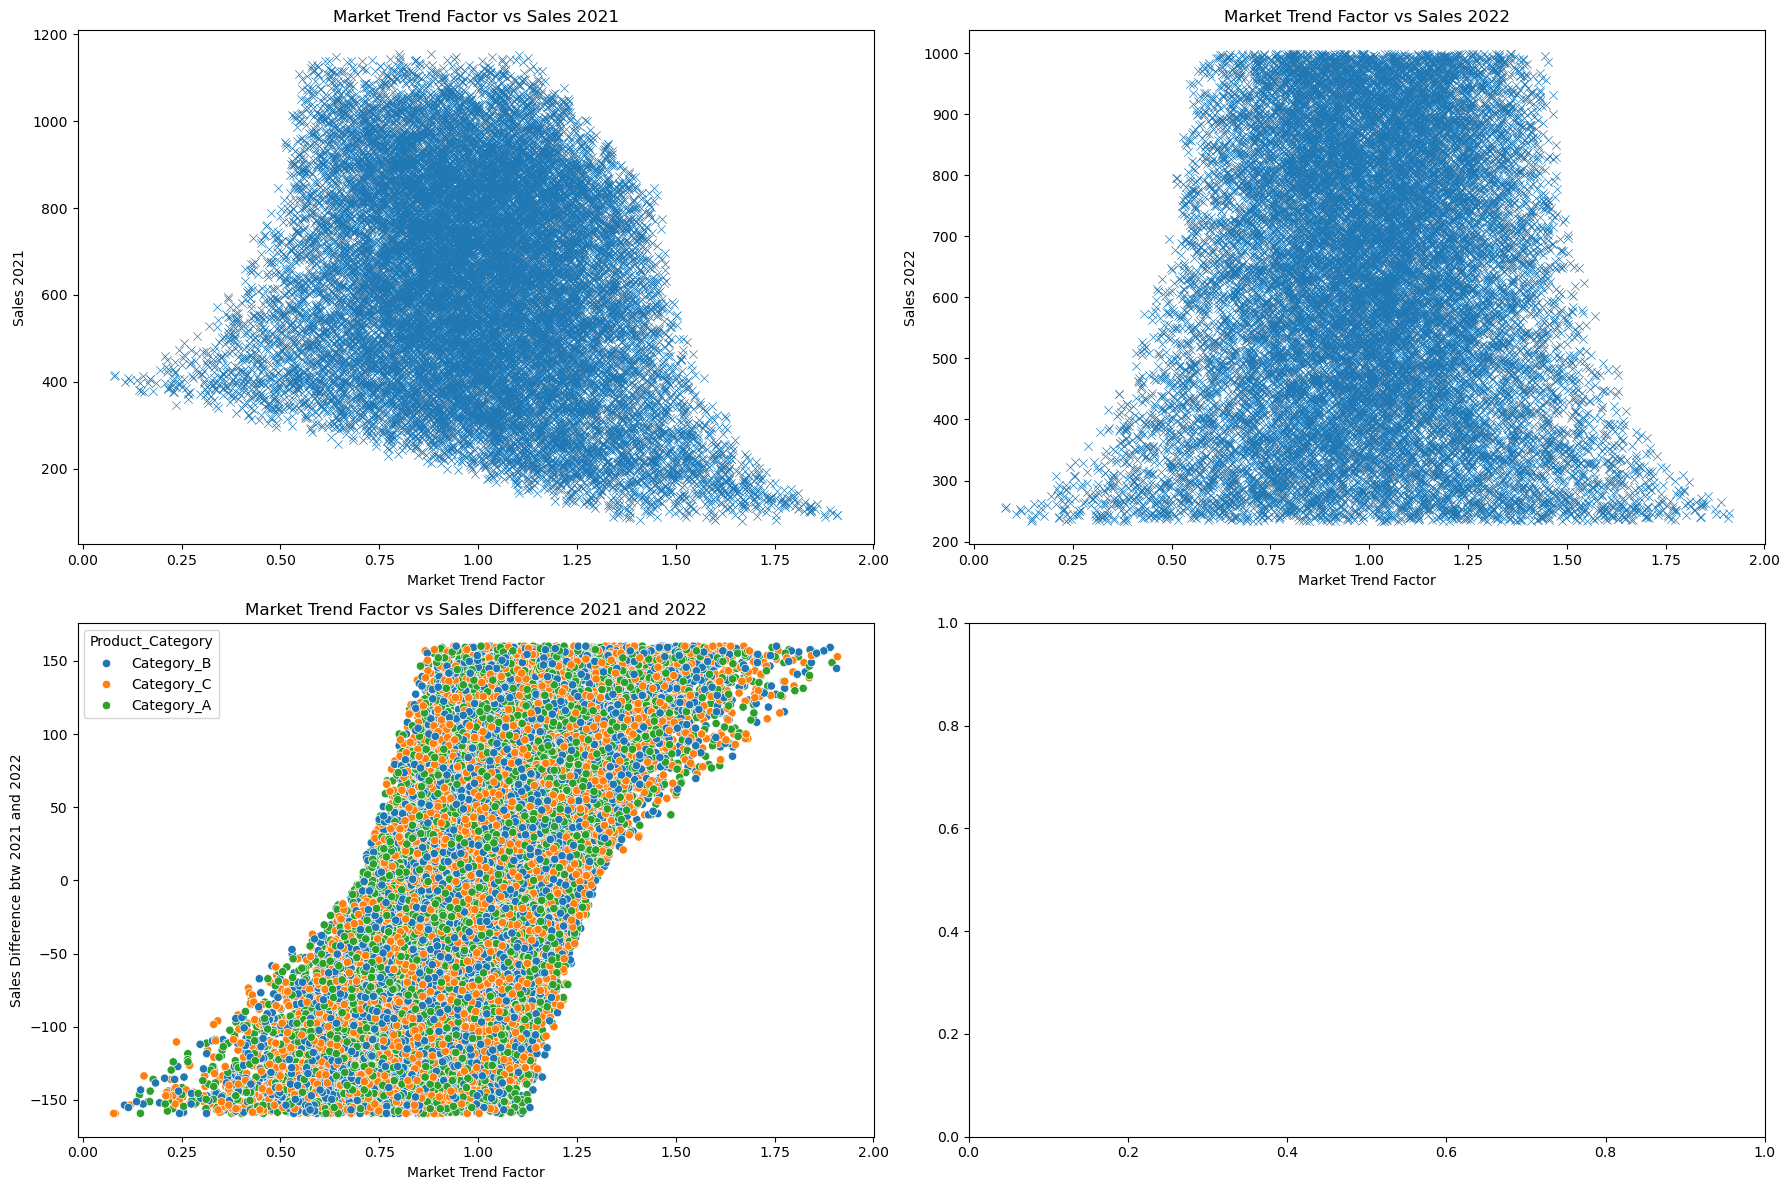

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Market Trend Factor against Sales 2021
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2021', ax=ax[0, 0], marker='x')
ax[0, 0].set_title('Market Trend Factor vs Sales 2021')
ax[0, 0].set_xlabel('Market Trend Factor')
ax[0, 0].set_ylabel('Sales 2021')

# Market Trend Factor against Sales 2022
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022', ax=ax[0, 1], marker='x')
ax[0, 1].set_title('Market Trend Factor vs Sales 2022')
ax[0, 1].set_xlabel('Market Trend Factor')
ax[0, 1].set_ylabel('Sales 2022')

# Market Trend Factor against difference between Sales 2022 and 2021
df['Sales_2022-Sales_2021'] = df['Sales_2022'] - df['Sales_2021']
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022-Sales_2021', ax=ax[1, 0], hue='Product_Category')
ax[1, 0].set_title('Market Trend Factor vs Sales Difference 2021 and 2022')
ax[1, 0].set_xlabel('Market Trend Factor')
ax[1, 0].set_ylabel('Sales Difference btw 2021 and 2022')
df.drop(columns=['Sales_2022-Sales_2021'], inplace=True)

plt.tight_layout()
plt.show()

## Bivarite Analysis: Sales for 2021 and 2022

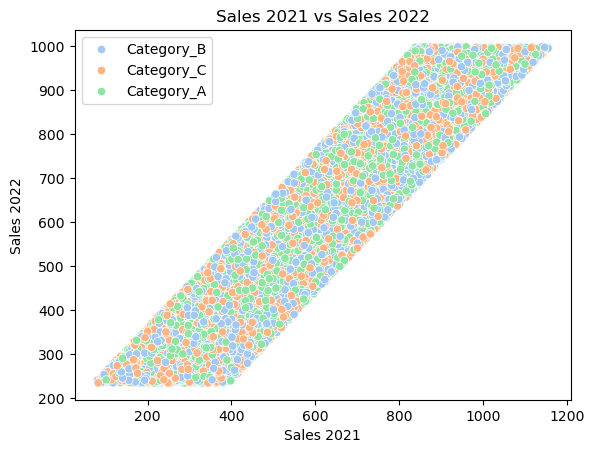

In [28]:
sns.scatterplot(data=df, x='Sales_2021', y='Sales_2022', hue='Product_Category', palette='pastel')
plt.title('Sales 2021 vs Sales 2022')
plt.xlabel('Sales 2021')
plt.ylabel('Sales 2022')
plt.legend(loc='upper left')
plt.show()

### Bivariate Analysis: Other pairs of variables

#### Product_Category Against:
#### Market Trend Factor,
 #### Shelve Life,
#### Safety_Stock_Days


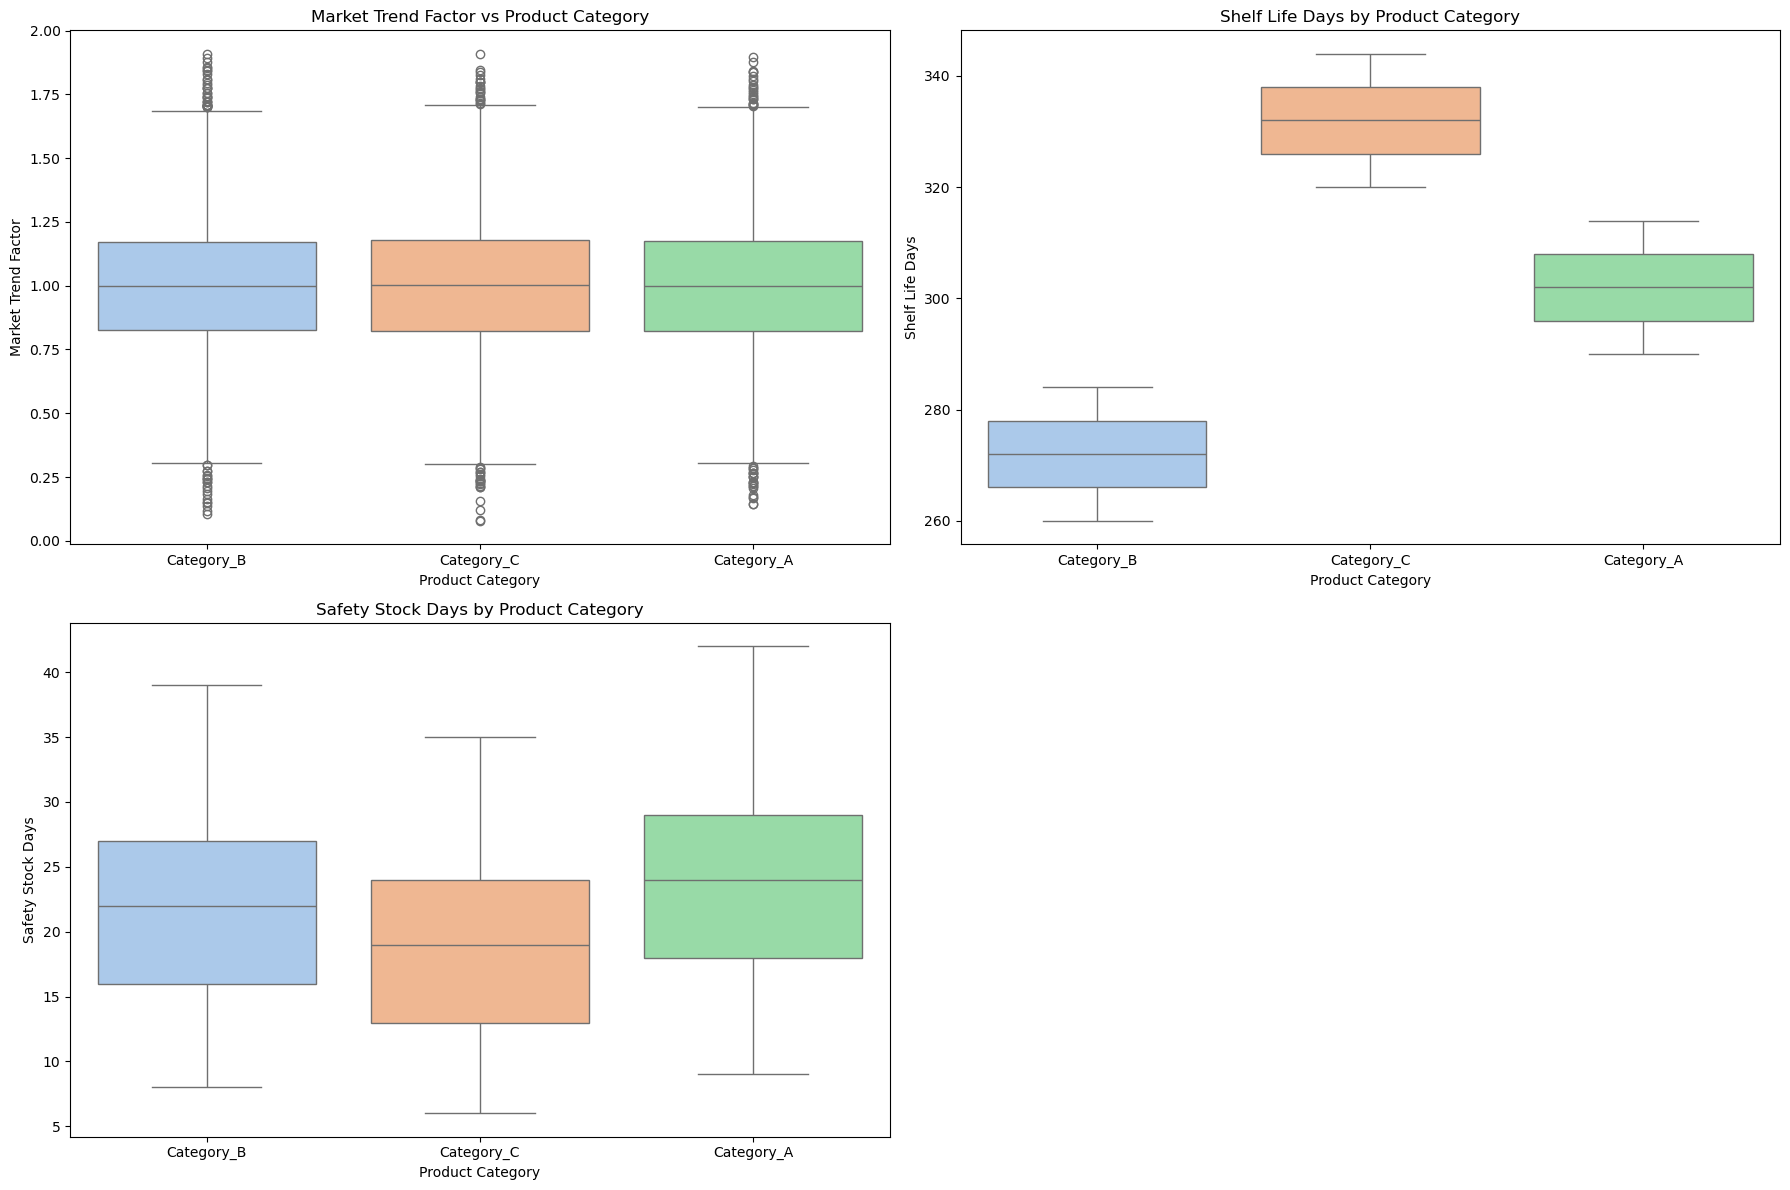

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Market Trend Factor and Product Category
sns.boxplot(data=df, x='Product_Category', y='Market_Trend_Factor', ax=ax[0, 0], palette='pastel')
ax[0, 0].set_title('Market Trend Factor vs Product Category')
ax[0, 0].set_xlabel('Product Category')
ax[0, 0].set_ylabel('Market Trend Factor')

# Shelf Life Days and Product Category
sns.boxplot(data=df, x='Product_Category', y='Shelf_Life_Days', ax=ax[0, 1], palette='pastel')
ax[0, 1].set_title('Shelf Life Days by Product Category')
ax[0, 1].set_xlabel('Product Category')
ax[0, 1].set_ylabel('Shelf Life Days')

# Safety Stock Days and Product Category
sns.boxplot(data=df, x='Product_Category', y='Safety_Stock_Days', ax=ax[1, 0], palette='pastel')
ax[1, 0].set_title('Safety Stock Days by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Safety Stock Days')

ax[1, 1].remove()

plt.tight_layout()
plt.show()

## Demand Forecasting and Inventory Optimization

### Demand Forecasting and Inventory Optimization using Market_Trend_Factor and Sales_2022 to estimate for 2023

#### Feature Engineering

In [32]:
df_mtf = pd.read_csv('Dataset.csv')


In [34]:
df_mtf['Projected_Sales_2023'] = df_mtf['Sales_2022'] * df_mtf['Market_Trend_Factor']

df_mtf['Projected_Sales_2023'] = df_mtf ['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)

#### Encode The Categorical Variables

In [36]:
cols = ['Compliance_Status',
        'Supplier_ID',
        'Manufacturing_Location',
        'Product_Category',
        'Storage_Location']

label_encoder ={}

for column in cols:
    le = LabelEncoder()
    df_mtf[column] = le.fit_transform(df_mtf[column])
    label_encoder[column] = le
    

In [38]:
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,493.935278
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,335.512507
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,938.857721
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,684.538694
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,452.625369


 #### Prepare X and Y Data

In [40]:
x = df_mtf.drop(columns=['Product_ID', 'Projected_Sales_2023'])
y = df_mtf['Projected_Sales_2023']

In [42]:
x_train, x_test, y_train, y_test = train_test_split (x,
                                                    y,
                                                    test_size=0.3,
                                                   random_state=42)

#### Demand Forcasting

In [44]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error (y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error (y_test, y_pred) * 100

print ('MAE:', mae)
print ('RMSE:', rmse)
print ('MAPE:', mape)

MAE: 6.212184886405061
RMSE: 71.12398298749922
MAPE: 1.1942184993112577


#### Inventory Optimization

Get Average Daily Sales

In [46]:
 df_mtf['Average_Daily_Sales'] = (df_mtf['Sales_2021'] + df_mtf['Sales_2022']) / (2*365)

Get Safety Stock

In [48]:
df_mtf['Safety_Stock'] = df_mtf['Safety_Stock_Days'] * df_mtf['Average_Daily_Sales']

Optimal Inventory for 2023

In [50]:
df_mtf['Optimal_Inventory_2023'] = df_mtf['Projected_Sales_2023'] + df_mtf['Safety_Stock']

Including Shelf life in the Estimation

In [52]:
df_mtf['Optimal_Inventory_2023'] = df_mtf.apply(lambda row: min(row['Optimal_Inventory_2023'],
                                                                row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)

### Demand Forecasting and Inventory Optimization: Linear Projection

#### Feature Engineering

Generally, the formular is: $y_1 + Slope * (x - x_1)$

Generally, Slope is: $Slope = \frac{y_2 - y_1}{x_1 - x_0}$

So, for our usecase:
$x= Year$, $y = Sales$

$Projected\Sales\_2023 = Sales\_2021 + Slope * (2023-2021)$ Sales\_2021 + 2 * Slope $ 

$Slope = \frac{Sales\_2022 - Sales\_2021}{2022-2021} = Sales\_2022 - Sales\_2021$

In [54]:
 df_lp = pd.read_csv('Dataset.csv')

In [56]:
slope =df_lp ['Sales_2022'] - df_lp['Sales_2021']

df_lp['Projected_Sales_2023'] =df_lp['Sales_2021'] + 2* slope

df_lp['Projected_Sales_2023'] = df_lp['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)


Encode the categorical variables

In [63]:
cols = ['Compliance_Status',
        'Supplier_ID',
        'Manufacturing_Location',
        'Product_Category',
        'Storage_Location']

label_encoders ={}
for column in cols:
    le =LabelEncoder()
    df_lp[column] = le.fit_transform(df_lp[column])
    label_encoders[column] = le

In [65]:
df_lp.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,487.4
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,330.6
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,847.0
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,712.6
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,533.2


Get and split the data into train and test sets

In [68]:
x = df_lp.drop(columns= ['Product_ID', 'Projected_Sales_2023'])
y = df_lp['Projected_Sales_2023']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

#### Demand Forecasting

Build The Model

In [77]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print('MAE:', mae)
print('RSME:', rmse)
print('MAPE:', mape)

MAE: 7.2850558899398115
RSME: 9.722508301349988
MAPE: 1.5117954642581104


#### Inventory Optimization

Get Average daily sales.

In [81]:
df_lp['Average_Daily_Sales'] = (df_lp['Sales_2021'] + df_lp['Sales_2022']) / (2*365)

Get the safety stock

In [84]:
df_lp['Safety_Stock'] = df_lp['Safety_Stock_Days'] = df_lp['Average_Daily_Sales']

Optimal Inventory for 2023

In [87]:
df_lp['Optimal_Inventory_2023'] = df_lp['Projected_Sales_2023'] + df_lp['Safety_Stock']

#### Adjust this value to account for shelf life.

In [96]:
df_lp['Optimal_Inventory_2023'] = df_lp.apply(lambda row: min(row['Optimal_Inventory_2023'],
                                                              row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)

## Conclusion

Result from Market Trend Factor and Sales 2022

In [102]:
df_mtf[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']].head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,493.935278,34.585205,435.459178
1,Product_2,335.512507,23.158356,330.971507
2,Product_3,938.857721,62.400000,756.600000
3,Product_4,684.538694,42.202740,628.820822
4,Product_5,452.625369,21.770959,269.545205


In [107]:
columns = ['Projected_Sales_2023', 'Optimal_Inventory_2023']
errors = dict()
for col in columns:
    mtf, lp = df_mtf[col], df_lp[col]

mae= mean_absolute_error(mtf, lp)
rmse = mean_squared_error(mtf, lp)
mape = mean_absolute_percentage_error(mtf, lp) *100

errors[col] = [mae, rmse, mape]
pd.DataFrame(errors, index=['MAE', 'RMSE', 'MAPE'])

,Optimal_Inventory_2023
MAE,18.115011
RMSE,1623.855336
MAPE,4.623825
